# The Impact of OBP and SLG on Winning for 1999-2003 MLB 

## Reproducing Hakes and Sauer Table 1 ~ Moneyball Analysis

## Import Necceary Modules

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

## Read in MLB data for 1999 to 2003

In [33]:
Teams = pd.read_excel("MLB Game logs 1999-2003.xlsx")

## Print dataframe columns

In [3]:
print(Teams.columns.tolist())

['date', 'game_number', 'day', 'visitor', 'visitor_lg', 'visitor_game_number', 'home', 'home_lg', 'home_game_number', 'visitor_score', 'home_score', 'outs', 'daynight', 'completion', 'forfeit', 'protest', 'park', 'attendance', 'game_minutes', 'visitor_linescore', 'home_linescore', 'visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_rbi', 'visitor_sh', 'visitor_sf', 'visitor_hbp', 'visitor_bb', 'visitor_ibb', 'visitor_so', 'visitor_sb', 'visitor_cs', 'visitor_gidp', 'visitor_ci', 'visitor_lob', 'visitor_pitchers_used', 'visitor_individual_er', 'visitor_team_er', 'visitor_wp', 'visitor_balks', 'visitor_putouts', 'visitor_assists', 'visitor_errors', 'visitor_passed_balls', 'visitor_double_plays', 'visitor_triple_plays', 'home_ab', 'home_h', 'home_2b', 'home_3b', 'home_hr', 'home_rbi', 'home_sh', 'home_sf', 'home_hbp', 'home_bb', 'home_ibb', 'home_so', 'home_sb', 'home_cs', 'home_gidp', 'home_ci', 'home_lob', 'home_pitchers_used', 'home_individual_er', 'home_team_

## Calculate home and away wins

In [35]:
Teams['hwin'] = np.where(Teams['home_score'] > Teams['visitor_score'],1,0)
Teams['awin'] = np.where(Teams['home_score'] < Teams['visitor_score'],1,0)

## Create year variable

In [36]:
Teams['year'] = Teams['date'].astype(str).str[0:4]
display(Teams)

,date,game_number,day,visitor,visitor_lg,visitor_game_number,home,home_lg,home_game_number,visitor_score,home_score,outs,daynight,completion,forfeit,protest,park,attendance,game_minutes,visitor_linescore,home_linescore,visitor_ab,visitor_h,visitor_2b,visitor_3b,...,home_batter_3_name,home_batter_3_pos,home_batter_4_id,home_batter_4_name,home_batter_4_pos,home_batter_5_id,home_batter_5_name,home_batter_5_pos,home_batter_6_id,home_batter_6_name,home_batter_6_pos,home_batter_7_id,home_batter_7_name,home_batter_7_pos,home_batter_8_id,home_batter_8_name,home_batter_8_pos,home_batter_9_id,home_batter_9_name,home_batter_9_pos,additional_info,acquisition,hwin,awin,year
0,19990404,0,Sun,COL,NL,1,SDN,NL,1,8,2,54,N,NaN,NaN,NaN,MNT01,27104,190,150001001,100000100,42,18,1,0,...,Tony Gwynn,9,joynw001,Wally Joyner,3,myerg001,Greg Myers,2,ariag001,George Arias,5,river002,Ruben Rivera,8,gomec001,Chris Gomez,6,ashba002,Andy Ashby,1,NaN,Y,0,1,1999
1,19990405,0,Mon,TBA,AL,1,BAL,AL,1,7,10,51,D,NaN,NaN,NaN,BAL12,46733,225,101111002,00420004x,38,12,3,0,...,Will Clark,3,bellj002,Albert Belle,9,conij001,Jeff Conine,10,ripkc001,Cal Ripken,5,surhb001,B.J. Surhoff,7,johnc002,Charles Johnson,2,reboj001,Jeff Reboulet,4,NaN,Y,1,0,1999
2,19990405,0,Mon,BOS,AL,1,KCA,AL,1,5,3,54,D,NaN,NaN,NaN,KAN06,40257,171,2002001,200000100,36,13,3,1,...,Johnny Damon,7,kingj001,Jeff King,3,suttl001,Larry Sutton,10,dye-j001,Jermaine Dye,9,kreuc001,Chad Kreuter,2,sancr001,Rey Sanchez,6,feblc001,Carlos Febles,4,NaN,Y,0,1,1999
3,19990405,0,Mon,NYA,AL,1,OAK,AL,1,3,5,48,N,NaN,NaN,NaN,OAK01,46380,160,10100010,2030,29,5,0,0,...,Jason Giambi,10,staim001,Matt Stairs,9,jahaj001,John Jaha,3,grieb001,Ben Grieve,7,chave001,Eric Chavez,5,hinca001,A.J. Hinch,2,tejam001,Miguel Tejada,6,NaN,Y,1,0,1999
4,19990405,0,Mon,CHA,AL,1,SEA,AL,1,8,2,54,N,NaN,NaN,NaN,SEA02,51656,154,100122200,2000000,36,12,2,1,...,Ken Griffey,8,marte001,Edgar Martinez,10,segud001,David Segui,3,buhnj001,Jay Buhner,9,mabrj001,John Mabry,7,davir002,Russ Davis,5,wilsd001,Dan Wilson,2,NaN,Y,0,1,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,20030928,0,Sun,NYN,NL,161,FLO,NL,162,0,4,51,D,NaN,NaN,NaN,MIA01,27529,132,0,10300000x,31,4,0,0,...,Mike Lowell,5,lee-d002,Derrek Lee,3,encaj001,Juan Encarnacion,9,conij001,Jeff Conine,7,gonza002,Alex Gonzalez,6,redmm001,Mike Redmond,2,willd003,Dontrelle Willis,1,NaN,Y,1,0,2003
12138,20030928,0,Sun,MIL,NL,162,HOU,NL,162,5,8,51,D,NaN,NaN,NaN,HOU03,37977,152,100001012,10320020x,36,8,4,1,...,Jeff Bagwell,3,kentj001,Jeff Kent,4,hidar001,Richard Hidalgo,9,berkl001,Lance Berkman,7,ausmb001,Brad Ausmus,2,evera001,Adam Everett,6,saark001,Kirk Saarloos,1,NaN,Y,1,0,2003
12139,20030928,0,Sun,ATL,NL,162,PHI,NL,162,5,2,54,D,NaN,NaN,NaN,PHI12,58554,171,10310000,101000000,36,13,3,0,...,Bobby Abreu,9,thomj002,Jim Thome,3,liebm001,Mike Lieberthal,2,burrp001,Pat Burrell,7,utlec001,Chase Utley,4,peret003,Tomas Perez,5,millk004,Kevin Millwood,1,NaN,Y,0,1,2003
12140,20030928,0,Sun,COL,NL,162,SDN,NL,162,10,8,54,D,NaN,NaN,NaN,SAN01,60988,184,30000520,100130210,37,11,1,0,...,Brian Giles,7,nevip001,Phil Nevin,3,kotsm001,Mark Kotsay,8,nadyx001,Xavier Nady,9,greek002,Khalil Greene,6,benng001,Gary Bennett,2,peavj001,Jake Peavy,1,NaN,Y,0,1,2003


## Aggregate home team statistics needed to construct SLG and OBP

In [14]:
Teamshome = Teams.groupby(['home','year'])[['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_sf',
                                           'visitor_hbp','visitor_bb','home_ab', 'home_h', 'home_2b', 'home_3b',
                                           'home_hr', 'home_sf', 'home_hbp', 'home_bb', 'hwin','awin']].sum()
Teamshome = Teamshome.reset_index()
Teamshome = Teamshome.rename(columns = {"home": "Team"})
Teamshome

,Team,year,visitor_ab,visitor_h,visitor_2b,visitor_3b,visitor_hr,visitor_sf,visitor_hbp,visitor_bb,home_ab,home_h,home_2b,home_3b,home_hr,home_sf,home_hbp,home_bb,hwin,awin
0,ANA,1999,2832,762,151,10,105,39,27,322,2666,669,118,13,74,21,23,267,37,44
1,ANA,2000,2867,800,144,8,113,24,15,320,2742,788,146,11,130,23,24,315,46,35
2,ANA,2001,2873,772,165,6,86,20,39,259,2736,731,122,12,86,29,30,251,39,42
3,ANA,2002,2799,685,132,5,70,29,22,260,2757,769,155,21,71,27,34,228,54,27
4,ANA,2003,2868,743,142,9,84,17,39,245,2685,717,135,17,68,22,27,226,45,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,TOR,1999,2891,817,190,11,93,31,25,289,2731,765,173,6,96,21,44,283,40,41
146,TOR,2000,2910,819,182,11,92,19,30,279,2766,768,178,9,134,12,33,255,45,36
147,TOR,2001,2911,800,207,17,84,25,46,264,2809,757,146,14,94,31,37,256,40,42
148,TOR,2002,2838,749,171,10,89,28,37,288,2729,734,164,20,102,24,30,258,42,39


## Aggregate home team statistics needed to construct SLG and OBP

In [37]:
Teamsaway = Teams.groupby(['year','visitor'])[['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 
                                           'visitor_hr', 'visitor_sf', 'visitor_hbp', 'visitor_bb', 
                                           'home_ab', 'home_h', 'home_2b', 'home_3b', 'home_hr', 
                                           'home_sf', 'home_hbp', 'home_bb','hwin','awin']].sum()

Teamsaway = Teamsaway.reset_index()
Teamsaway = Teamsaway.rename(columns = {"visitor": "Team"}) 
Teamsaway

,year,Team,visitor_ab,visitor_h,visitor_2b,visitor_3b,visitor_hr,visitor_sf,visitor_hbp,visitor_bb,home_ab,home_h,home_2b,home_3b,home_hr,home_sf,home_hbp,home_bb,hwin,awin
0,1999,ANA,2828,735,130,9,84,21,20,244,2645,710,134,15,72,26,29,302,48,33
1,1999,ARI,2928,812,147,15,115,29,31,303,2751,694,123,12,92,14,22,287,33,48
2,1999,ATL,2901,777,151,14,111,19,31,322,2772,724,131,9,67,22,16,286,34,47
3,1999,BAL,2905,810,163,12,105,23,25,300,2638,708,157,19,97,22,19,318,44,37
4,1999,BOS,2857,758,157,22,96,27,25,292,2704,674,134,10,88,23,23,243,36,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2003,SFN,2752,689,147,10,98,18,26,287,2590,657,124,12,75,26,23,285,37,43
146,2003,SLN,2914,781,159,21,111,30,34,300,2831,815,180,16,117,27,37,276,44,37
147,2003,TBA,2859,749,140,17,81,29,27,188,2663,719,163,17,100,30,32,317,54,27
148,2003,TEX,2877,708,133,13,99,15,41,242,2719,770,154,17,103,34,24,319,53,28


## Merge Teamshome and Teamsaway

In [38]:
Teams2 = pd.merge(Teamshome, Teamsaway, on =['Team','year'])
pd.set_option('display.max_columns', 50)
display(Teams2)

,Team,year,visitor_ab_x,visitor_h_x,visitor_2b_x,visitor_3b_x,visitor_hr_x,visitor_sf_x,visitor_hbp_x,visitor_bb_x,home_ab_x,home_h_x,home_2b_x,home_3b_x,home_hr_x,home_sf_x,home_hbp_x,home_bb_x,hwin_x,awin_x,visitor_ab_y,visitor_h_y,visitor_2b_y,visitor_3b_y,visitor_hr_y,visitor_sf_y,visitor_hbp_y,visitor_bb_y,home_ab_y,home_h_y,home_2b_y,home_3b_y,home_hr_y,home_sf_y,home_hbp_y,home_bb_y,hwin_y,awin_y
0,ANA,1999,2832,762,151,10,105,39,27,322,2666,669,118,13,74,21,23,267,37,44,2828,735,130,9,84,21,20,244,2645,710,134,15,72,26,29,302,48,33
1,ANA,2000,2867,800,144,8,113,24,15,320,2742,788,146,11,130,23,24,315,46,35,2886,786,163,23,106,20,23,293,2742,734,132,15,115,29,21,342,45,36
2,ANA,2001,2873,772,165,6,86,20,39,259,2736,731,122,12,86,29,30,251,39,42,2815,716,153,14,72,24,47,243,2656,680,120,13,82,19,25,266,45,36
3,ANA,2002,2799,685,132,5,70,29,22,260,2757,769,155,21,71,27,34,228,54,27,2921,834,178,11,81,37,40,234,2654,660,116,14,99,30,27,249,36,45
4,ANA,2003,2868,743,142,9,84,17,39,245,2685,717,135,17,68,22,27,226,45,37,2802,756,141,16,82,28,29,250,2664,701,118,18,106,25,37,241,48,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,TOR,1999,2891,817,190,11,93,31,25,289,2731,765,173,6,96,21,44,283,40,41,2911,815,164,8,116,24,32,295,2753,765,135,22,98,26,28,286,37,44
146,TOR,2000,2910,819,182,11,92,19,30,279,2766,768,178,9,134,12,33,255,45,36,2911,794,150,12,110,22,27,271,2759,796,156,12,103,21,34,281,43,38
147,TOR,2001,2911,800,207,17,84,25,46,264,2809,757,146,14,94,31,37,256,40,42,2854,732,141,22,101,12,37,214,2738,753,150,9,81,18,30,226,40,40
148,TOR,2002,2838,749,171,10,89,28,37,288,2729,734,164,20,102,24,30,258,42,39,2852,723,141,18,85,33,23,264,2745,755,141,19,88,24,34,302,45,36


## Calculate total wins for each team

In [18]:
Teams2['wins'] = Teams2['hwin_x']+Teams2['awin_y']

## Calculate OBPFOR and OBPAGN

In [19]:
Teams2['OBPFOR'] = ((Teams2['home_h_x']+Teams2['visitor_h_y']+
                    Teams2['home_bb_x']+Teams2['visitor_bb_y']+
                    Teams2['home_hbp_x']+Teams2['visitor_hbp_y'])/
                    (Teams2['home_ab_x']+Teams2['visitor_ab_y']+
                     Teams2['home_bb_x']+Teams2['visitor_bb_y']+
                     Teams2['home_hbp_x']+Teams2['visitor_hbp_y']+
                     Teams2['home_sf_x']+Teams2['visitor_sf_y']))

In [20]:
Teams2['OBPAGN'] = ((Teams2['home_h_y']+Teams2['visitor_h_x']+
                    Teams2['home_bb_y']+Teams2['visitor_bb_x']+
                    Teams2['home_hbp_y']+Teams2['visitor_hbp_x'])/
                    (Teams2['home_ab_y']+Teams2['visitor_ab_x']+
                     Teams2['home_bb_y']+Teams2['visitor_bb_x']+
                     Teams2['home_hbp_y']+Teams2['visitor_hbp_x']+
                     Teams2['home_sf_y']+Teams2['visitor_sf_x']))

## Calculate SLGFOR and SLGAGN

In [39]:
Teams2['SLGFOR'] = ((Teams2['home_h_x']+Teams2['visitor_h_y']-
                    (Teams2['home_2b_x']+Teams2['visitor_2b_y'])-
                    (Teams2['home_3b_x']+Teams2['visitor_3b_y'])-
                    (Teams2['home_hr_x']+Teams2['visitor_hr_y'])+
                    2*Teams2['home_2b_x']+2*Teams2['visitor_2b_y']+
                    3*Teams2['home_3b_x']+3*Teams2['visitor_3b_y']+
                    4*Teams2['home_hr_x']+4*Teams2['visitor_hr_y'])/
                    (Teams2['home_ab_x']+Teams2['visitor_ab_y']))

In [22]:
Teams2['SLGAGN'] = ((Teams2['home_h_y']+Teams2['visitor_h_x']-
                    (Teams2['home_2b_y']+Teams2['visitor_2b_x'])-
                    (Teams2['home_3b_y']+Teams2['visitor_3b_x'])-
                    (Teams2['home_hr_y']+Teams2['visitor_hr_x'])+
                    2*Teams2['home_2b_y']+2*Teams2['visitor_2b_x']+
                    3*Teams2['home_3b_y']+3*Teams2['visitor_3b_x']+
                    4*Teams2['home_hr_y']+4*Teams2['visitor_hr_x'])/
                    (Teams2['home_ab_y']+Teams2['visitor_ab_x']))

## Only keep the stats we need to reproduce H & S table 1

In [23]:
Teams3 = Teams2[['year', 'Team', 'wins','OBPFOR','OBPAGN','SLGFOR','SLGAGN']]
Teams3

,year,Team,wins,OBPFOR,OBPAGN,SLGFOR,SLGAGN
0,1999,ANA,70,0.321511,0.345869,0.394976,0.426876
1,2000,ANA,82,0.352355,0.350943,0.472459,0.452844
2,2001,ANA,75,0.326802,0.331493,0.404972,0.412190
3,2002,ANA,99,0.340714,0.313509,0.432547,0.392078
4,2003,ANA,77,0.330367,0.326923,0.412794,0.420824
...,...,...,...,...,...,...,...
145,1999,TOR,84,0.352310,0.349186,0.457462,0.451099
146,2000,TOR,83,0.341115,0.353545,0.469262,0.455812
147,2001,TOR,80,0.325280,0.338607,0.429631,0.434944
148,2002,TOR,78,0.327056,0.343869,0.429851,0.430772


## Calculate number of home and away games and then merge into total games

In [24]:
TeamsGh = Teams.groupby(['year','home'])['hwin'].count()
TeamsGh = TeamsGh.reset_index()
TeamsGh = TeamsGh.rename(columns = {"home": 'Team'}) 

TeamsGa = Teams.groupby(['year','visitor'])['awin'].count()
TeamsGa = TeamsGa.reset_index()
TeamsGa = TeamsGa.rename(columns = {"visitor": 'Team'}) 

TeamsG = pd.merge(TeamsGh, TeamsGa, on =['Team','year'])
TeamsG['Games'] = TeamsG['hwin']+TeamsG['awin']
TeamsG = TeamsG[['year','Team','Games']]
TeamsG

,year,Team,Games
0,1999,ANA,162
1,1999,ARI,162
2,1999,ATL,162
3,1999,BAL,162
4,1999,BOS,162
...,...,...,...
145,2003,SFN,161
146,2003,SLN,162
147,2003,TBA,162
148,2003,TEX,162


## Merge total games into Teams3 df

In [25]:
Teams3 = pd.merge(Teams3, TeamsG, on =['Team','year'])
Teams3

,year,Team,wins,OBPFOR,OBPAGN,SLGFOR,SLGAGN,Games
0,1999,ANA,70,0.321511,0.345869,0.394976,0.426876,162
1,2000,ANA,82,0.352355,0.350943,0.472459,0.452844,162
2,2001,ANA,75,0.326802,0.331493,0.404972,0.412190,162
3,2002,ANA,99,0.340714,0.313509,0.432547,0.392078,162
4,2003,ANA,77,0.330367,0.326923,0.412794,0.420824,162
...,...,...,...,...,...,...,...,...
145,1999,TOR,84,0.352310,0.349186,0.457462,0.451099,162
146,2000,TOR,83,0.341115,0.353545,0.469262,0.455812,162
147,2001,TOR,80,0.325280,0.338607,0.429631,0.434944,162
148,2002,TOR,78,0.327056,0.343869,0.429851,0.430772,162


## Calculate win percentage for each team

In [26]:
Teams3['wpc'] = Teams3['wins']/Teams3['Games']
Teams3

,year,Team,wins,OBPFOR,OBPAGN,SLGFOR,SLGAGN,Games,wpc
0,1999,ANA,70,0.321511,0.345869,0.394976,0.426876,162,0.432099
1,2000,ANA,82,0.352355,0.350943,0.472459,0.452844,162,0.506173
2,2001,ANA,75,0.326802,0.331493,0.404972,0.412190,162,0.462963
3,2002,ANA,99,0.340714,0.313509,0.432547,0.392078,162,0.611111
4,2003,ANA,77,0.330367,0.326923,0.412794,0.420824,162,0.475309
...,...,...,...,...,...,...,...,...,...
145,1999,TOR,84,0.352310,0.349186,0.457462,0.451099,162,0.518519
146,2000,TOR,83,0.341115,0.353545,0.469262,0.455812,162,0.512346
147,2001,TOR,80,0.325280,0.338607,0.429631,0.434944,162,0.493827
148,2002,TOR,78,0.327056,0.343869,0.429851,0.430772,162,0.481481


## Run the neccesary regressions

In [28]:
WinOBP_lm = smf.ols(formula = 'wpc ~ OBPFOR + OBPAGN', data=Teams3).fit()
WinOBP_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     348.5
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           1.62e-56
Time:                        10:56:09   Log-Likelihood:                 301.40
No. Observations:                 150   AIC:                            -596.8
Df Residuals:                     147   BIC:                            -587.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5030      0.087      5.776      0.000       0.331       0.675
OBPFOR         3.3009      0.189     17.459      0.000       2.927       3.675
OBPAGN        -3.3105      0.171    -19.341      0.000      -3.649      -2.972
==============================================================================
Omnibus:                        1.861   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.460
Skew:                          -0.013   Prob(JB):                        0.482
Kurtosis:                       2.517   Cond. No.                         85.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
WinSLG_lm = smf.ols(formula = 'wpc ~ SLGFOR + SLGAGN', data=Teams3).fit()
WinSLG_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           5.57e-50
Time:                        10:56:27   Log-Likelihood:                 286.04
No. Observations:                 150   AIC:                            -566.1
Df Residuals:                     147   BIC:                            -557.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5904      0.065      9.015      0.000       0.461       0.720
SLGFOR         1.7552      0.116     15.134      0.000       1.526       1.984
SLGAGN        -1.9676      0.107    -18.456      0.000      -2.178      -1.757
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.565
Skew:                          -0.127   Prob(JB):                        0.754
Kurtosis:                       2.838   Cond. No.                         50.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
WinOBPSLG_lm = smf.ols(formula = 'wpc ~ OBPFOR + OBPAGN + SLGFOR + SLGAGN', data=Teams3).fit()
WinOBPSLG_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     279.0
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           5.15e-67
Time:                        10:56:34   Log-Likelihood:                 332.53
No. Observations:                 150   AIC:                            -655.1
Df Residuals:                     145   BIC:                            -640.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5052      0.073      6.930      0.000       0.361       0.649
OBPFOR         2.1215      0.255      8.331      0.000       1.618       2.625
OBPAGN        -1.9156      0.256     -7.489      0.000      -2.421      -1.410
SLGFOR         0.8143      0.141      5.775      0.000       0.536       1.093
SLGAGN        -0.9897      0.144     -6.868      0.000      -1.275      -0.705
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.426
Skew:                          -0.196   Prob(JB):                        0.490
Kurtosis:                       2.727   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
WinOBPSLGR_lm = smf.ols(formula = 'wpc ~ I(OBPFOR - OBPAGN) + I(SLGFOR - SLGAGN)', data=Teams3).fit()
WinOBPSLGR_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     561.8
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           1.43e-69
Time:                        10:56:59   Log-Likelihood:                 332.07
No. Observations:                 150   AIC:                            -658.1
Df Residuals:                     147   BIC:                            -649.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4997      0.002    229.103      0.000       0.495       0.504
I(OBPFOR - OBPAGN)     2.0327      0.180     11.318      0.000       1.678       2.388
I(SLGFOR - SLGAGN)     0.8992      0.104      8.618      0.000       0.693       1.105
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.573
Skew:                          -0.229   Prob(JB):                        0.455
Kurtosis:                       2.796   Cond. No.                         92.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Reproducing the final table

In [34]:
Header = ['1','2','3','4']
Table_1 = summary_col([WinOBP_lm,WinSLG_lm,WinOBPSLG_lm,WinOBPSLGR_lm],\
                      regressor_order=['Intercept','OBPFOR','OBPAGN','SLGFOR','SLGAGN'],model_names = Header)
print(Table_1)


                      1        2        3        4    
------------------------------------------------------
Intercept          0.5030   0.5904   0.5052   0.4997  
                   (0.0871) (0.0655) (0.0729) (0.0022)
OBPFOR             3.3009            2.1215           
                   (0.1891)          (0.2546)         
OBPAGN             -3.3105           -1.9156          
                   (0.1712)          (0.2558)         
SLGFOR                      1.7552   0.8143           
                            (0.1160) (0.1410)         
SLGAGN                      -1.9676  -0.9897          
                            (0.1066) (0.1441)         
I(OBPFOR - OBPAGN)                            2.0327  
                                              (0.1796)
I(SLGFOR - SLGAGN)                            0.8992  
                                              (0.1043)
R-squared          0.8258   0.7863   0.8850   0.8843  
R-squared Adj.     0.8235   0.7834   0.8818   0.8827  
Standard 

## Compare to the original table

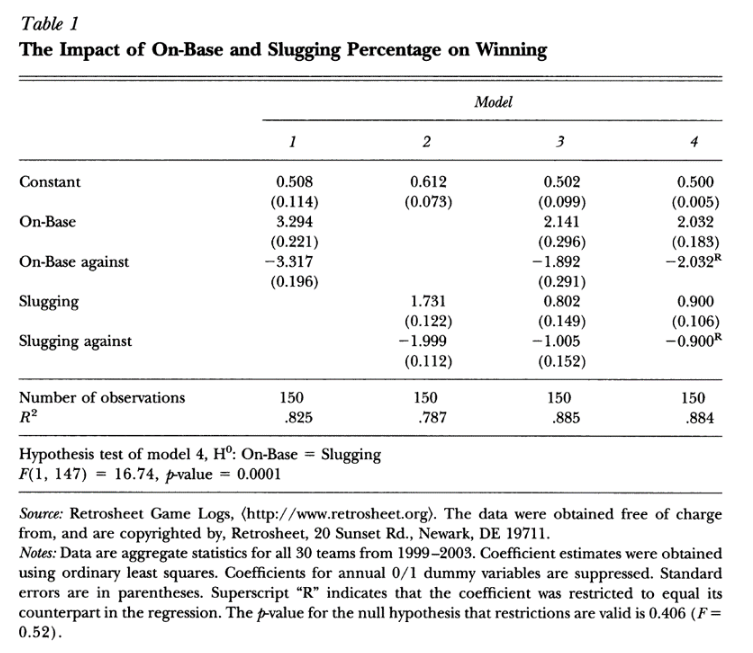

In [43]:
from IPython import display
display.Image("HStable1.png")